# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('F:/aai/code/Assignments_DonorsChoose_2018/donors dataset/train_data_nb.csv', nrows=20000)
resource_data = pd.read_csv('F:/aai/code/Assignments_DonorsChoose_2018/donors dataset/resources_data_nb.csv', nrows=20000)

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (20000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (20000, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

** Preprocessing of teacher prefix **

In [7]:
project_data.teacher_prefix.replace(np.nan,'Othr',inplace=True)

In [8]:
prefixes = list(project_data['teacher_prefix'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

clean_prefixes = []
for i in prefixes:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    if i is None:
        i = 'Othr'
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
        temp = temp.replace("'","")
        temp = temp.replace('.','')
    clean_prefixes.append(temp.strip())

project_data['clean_prefixes'] = clean_prefixes
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

In [9]:
clean_prefixes[1:10]

['Mr', 'Ms', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Ms', 'Mrs', 'Ms']

** Preprocessing of project_grade_category  **

In [10]:
proj_grade_cats = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

clean_proj_grade_cats = []
for i in proj_grade_cats:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    clean_proj_grade_cats.append(temp.strip())

project_data['clean_proj_grade_cats'] = proj_grade_cats
project_data.drop(['project_grade_category'], axis=1, inplace=True)

## 1.3 Text preprocessing

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories clean_prefixes  \
0             Literacy_Language                  ESL Literacy            Mrs   
1  History_Civics Health_Sports  Civics_Government TeamSports             Mr   

  clean_proj_grade_cats                                              essay  
0         Grades PreK-2  My students are English learners that are work...  
1            Grades 6-8  Our students arrive to our school eager to lea...

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[15])
print("="*50)
print(project_data['essay'].values[10])
print("="*50)
print(project_data['essay'].values[200])
print("="*50)
print(project_data['essay'].values[999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[200])
print(sent)
print("="*50)

As an inclusion kindergarten teacher, I am constantly looking for materials to help students develop and grow throughout the school year.  This has been challenging with the school is limited funding for supplies. \r\n\r\nWe are a classroom of 20 friendly and curious learners, from various ethnic backgrounds, facing challenges, including poverty and developmental delays.\r\n\r\nMy students are future scholars, teachers, doctors, and accomplished human beings.  I need the public is help to raise money for materials that help maintain the attention of my special needs students.Last year was my first year teaching Kindergarten inclusion.  I learned that students can wiggle, and learn at the same time!\r\n\r\nMy students need sensory toys to maintain focus on simple tasks that will shape their social and academic future.  My students with ADHD find themselves moving their hands, feet, and bodies without much control.  Sensory toys help my students use their energy in a positive manner (fid

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

As an inclusion kindergarten teacher, I am constantly looking for materials to help students develop and grow throughout the school year.  This has been challenging with the school is limited funding for supplies.     We are a classroom of 20 friendly and curious learners, from various ethnic backgrounds, facing challenges, including poverty and developmental delays.    My students are future scholars, teachers, doctors, and accomplished human beings.  I need the public is help to raise money for materials that help maintain the attention of my special needs students.Last year was my first year teaching Kindergarten inclusion.  I learned that students can wiggle, and learn at the same time!    My students need sensory toys to maintain focus on simple tasks that will shape their social and academic future.  My students with ADHD find themselves moving their hands, feet, and bodies without much control.  Sensory toys help my students use their energy in a positive manner (fidget toys, bo

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

As an inclusion kindergarten teacher I am constantly looking for materials to help students develop and grow throughout the school year This has been challenging with the school is limited funding for supplies We are a classroom of 20 friendly and curious learners from various ethnic backgrounds facing challenges including poverty and developmental delays My students are future scholars teachers doctors and accomplished human beings I need the public is help to raise money for materials that help maintain the attention of my special needs students Last year was my first year teaching Kindergarten inclusion I learned that students can wiggle and learn at the same time My students need sensory toys to maintain focus on simple tasks that will shape their social and academic future My students with ADHD find themselves moving their hands feet and bodies without much control Sensory toys help my students use their energy in a positive manner fidget toys bouncy chairs etc With fidget toys my

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████| 20000/20000 [00:21<00:00, 923.00it/s]


In [20]:
# after preprocesing
preprocessed_essays[200]

'as inclusion kindergarten teacher i constantly looking materials help students develop grow throughout school year this challenging school limited funding supplies we classroom 20 friendly curious learners various ethnic backgrounds facing challenges including poverty developmental delays my students future scholars teachers doctors accomplished human beings i need public help raise money materials help maintain attention special needs students last year first year teaching kindergarten inclusion i learned students wiggle learn time my students need sensory toys maintain focus simple tasks shape social academic future my students adhd find moving hands feet bodies without much control sensory toys help students use energy positive manner fidget toys bouncy chairs etc with fidget toys students use energy play appropriately listening time i noticed students special needs able pay attention given proper tools models succeed my goal accommodate young learners special needs allow express p

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████| 20000/20000 [00:01<00:00, 15262.49it/s]


## 1.5 Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_prefixes',
       'clean_proj_grade_cats', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [23]:
bow_feature_names = []
tfidf_feature_names = []

In [24]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)
bow_feature_names.append(vectorizer.get_feature_names())
tfidf_feature_names.append(vectorizer.get_feature_names())

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (20000, 9)


In [25]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names() )
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)
bow_feature_names.append(vectorizer.get_feature_names())
tfidf_feature_names.append(vectorizer.get_feature_names())

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'College_CareerPrep', 'Other', 'Music', 'History_Geography', 'Health_LifeScience', 'ESL', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (20000, 30)


In [26]:
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
school_states = ['' if type(x) is not str else x for x in project_data['school_state'].values]
vectorizer.fit(school_states)
print(vectorizer.get_feature_names())

state_one_hot = vectorizer.transform(school_states)
print("Shape of matric after one hot encoding", state_one_hot.shape)
bow_feature_names.append(vectorizer.get_feature_names())
tfidf_feature_names.append(vectorizer.get_feature_names())

['VT', 'WY', 'ND', 'MT', 'NH', 'RI', 'DE', 'NE', 'SD', 'AK', 'NM', 'WV', 'HI', 'ME', 'DC', 'IA', 'ID', 'KS', 'AR', 'MN', 'MS', 'CO', 'KY', 'OR', 'MD', 'NV', 'AL', 'UT', 'TN', 'WI', 'CT', 'VA', 'NJ', 'AZ', 'MA', 'OK', 'WA', 'LA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matric after one hot encoding (20000, 51)


In [27]:
# feature encoding for teacher prefix

my_counter = Counter()
for word in project_data['clean_prefixes'].values:
    if type(word) is not str:
        word = ''
    my_counter.update(word.split())
    
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix.keys()), lowercase=False, binary=True)
teacher_prefix = ['' if type(x) is not str else x for x in project_data['clean_prefixes'].values]
vectorizer.fit(teacher_prefix)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(teacher_prefix)
print("Shape of matric after one hot encoding", teacher_prefix_one_hot.shape)
bow_feature_names.append(vectorizer.get_feature_names())
tfidf_feature_names.append(vectorizer.get_feature_names())

['Othr', 'Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matric after one hot encoding (20000, 5)


In [28]:
# feature encoding for project grade category

my_counter = Counter()
for word in project_data['clean_proj_grade_cats'].values:
    my_counter.update(word.split(','))

print(my_counter)

#dict sort by value python: https://stackoverflow.com/a/613218/4084039
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category.keys()), lowercase=False, binary=True)
project_grade_category = ['' if type(x) is not str else x for x in project_data['clean_proj_grade_cats'].values]
vectorizer.fit(project_grade_category)
print(vectorizer.get_feature_names())

project_grade_category_one_hot = vectorizer.transform(project_grade_category)
print("Shape of matric after one hot encoding", project_grade_category_one_hot.shape)
bow_feature_names.append(vectorizer.get_feature_names())
tfidf_feature_names.append(vectorizer.get_feature_names())

Counter({'Grades PreK-2': 8171, 'Grades 3-5': 6785, 'Grades 6-8': 3079, 'Grades 9-12': 1965})
['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2']
Shape of matric after one hot encoding (20000, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [29]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)
bow_feature_names.append(vectorizer.get_feature_names() )

Shape of matrix after one hot encodig  (20000, 8465)


In [30]:
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_bow.shape)
bow_feature_names.append(vectorizer.get_feature_names())

Shape of matrix after one hot encodig  (20000, 1032)


#### 1.5.2.2 TFIDF vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)
tfidf_feature_names.append(vectorizer.get_feature_names())

Shape of matrix after one hot encodig  (20000, 8465)


In [32]:
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)
tfidf_feature_names.append(vectorizer.get_feature_names())

Shape of matrix after one hot encodig  (20000, 1032)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [33]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [34]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [35]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████| 20000/20000 [00:12<00:00, 1555.88it/s]


20000
300


In [36]:
# compute average word2vec for each review.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|█████████████████████████████████| 20000/20000 [00:00<00:00, 26164.27it/s]


20000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [37]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [38]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████| 20000/20000 [01:49<00:00, 182.34it/s]


20000
300


In [39]:
# Similarly you can vectorize for title also

tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))

100%|█████████████████████████████████| 20000/20000 [00:01<00:00, 10683.74it/s]


20000
300


### 1.5.3 Vectorizing Numerical features

In [40]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [41]:
resource_data = resource_data.fillna(0)

In [42]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(resource_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(resource_data['price'].values.reshape(-1, 1))
bow_feature_names.append('price')
tfidf_feature_names.append('price')

Mean : 50.69824450000001, Standard deviation : 142.47660388938675


In [43]:
price_standardized

array([[ 0.68995016],
       [-0.25090607],
       [-0.29652759],
       ...,
       [ 0.66180519],
       [-0.14534488],
       [-0.07712315]])

In [44]:
quantity_scalar = StandardScaler()
quantity_scalar.fit(resource_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(resource_data['quantity'].values.reshape(-1, 1))
bow_feature_names.append('quantity')
tfidf_feature_names.append('quantity')

Mean : 3.01465, Standard deviation : 8.96600442658267


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [45]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(20000, 9)
(20000, 30)
(20000, 8465)
(20000, 1)


In [46]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(20000, 8505)

In [47]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Assignment 4: Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Naive Bayes </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_essays, project_data['project_is_approved'], test_size=0.3, random_state=1)

In [49]:
def plotROC(clf, parameters, paramName):
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']

    plt.plot(parameters[paramName], train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters[paramName],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(parameters[paramName], cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters[paramName],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

    plt.scatter(parameters[paramName], train_auc, label='Train AUC points')
    plt.scatter(parameters[paramName], cv_auc, label='CV AUC points')


    plt.legend()
    plt.xlabel("Hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

In [50]:
import itertools

def plot_confusion_matrix(cm, classes,title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white"
                if cm[i,j] > thresh else "black")
        
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h2>2.4 Applying NB() on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Naive Bayes on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [51]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

def normalizeData(data):
    # train the normalization
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(data)
    # normalize the dataset and print the first 5 rows
    normalized = scaler.transform(data)
    return normalized

In [52]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    print(tr_loop)
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0] > tr_loop:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

### 2.4.1 Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

In [70]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from scipy import sparse

categories_one_hot_n = normalizeData(categories_one_hot.toarray())
sub_categories_one_hot_n = normalizeData(sub_categories_one_hot.toarray())
state_one_hot_n = normalizeData(state_one_hot.toarray())
teacher_prefix_one_hot_n = normalizeData(teacher_prefix_one_hot.toarray())
project_grade_category_one_hot_n = normalizeData(project_grade_category_one_hot.toarray())
text_bow_n = normalizeData(text_bow.toarray())
title_bow_n = normalizeData(title_bow.toarray())
price_standardized_n = normalizeData(price_standardized)
quantity_standardized_n = normalizeData(quantity_standardized)

In [71]:
X = hstack((sparse.csr_matrix(categories_one_hot_n) ,
            sparse.csr_matrix(sub_categories_one_hot_n),
            sparse.csr_matrix(state_one_hot_n), 
           sparse.csr_matrix(teacher_prefix_one_hot_n), 
            sparse.csr_matrix(project_grade_category_one_hot_n)
            ,text_bow_n, 
            title_bow_n, 
            price_standardized_n, quantity_standardized_n
           ))

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, project_data['project_is_approved'], test_size=0.2, random_state=1)

(20000, 9598)


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import sklearn

#create model object
nbbow = MultinomialNB()

#The number of neighbors that we want to use to find best K
param_grid = {'alpha': [ 0.0001, 0.001,0.01,0.1,1,10,100,1000]}
nbbow = GridSearchCV(nbbow, param_grid, cv=5, refit='AUC', return_train_score=True, scoring='roc_auc')
#fit model to data
nbbow.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring='roc_auc', verbose=0)

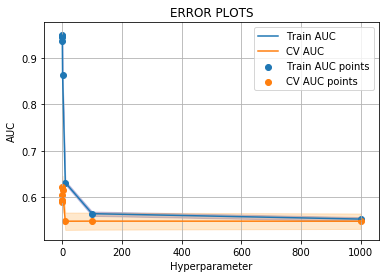

In [73]:
plotROC(nbbow, param_grid, 'alpha')

16000
4000


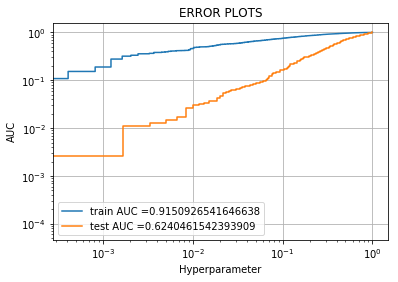

In [74]:
import sklearn.metrics as metrics

y_train_pred = batch_predict(nbbow, X_train)    
y_test_pred = batch_predict(nbbow, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.semilogx()
plt.semilogy()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [53]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999962546199264 for threshold 0.495


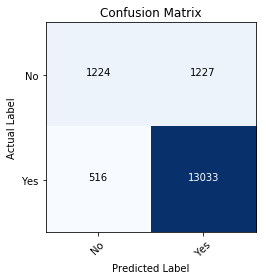

In [75]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
plot_confusion_matrix(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), classes=['No', 'Yes'])

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.88


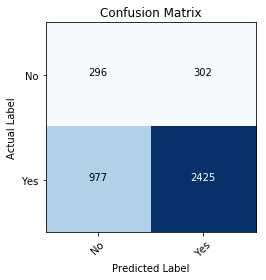

In [76]:
print("Test confusion matrix")
plot_confusion_matrix(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), classes=['No', 'Yes'])

#### 2.4.1.1 Top 10 important features of positive class from<font color='red'> SET 1</font>

** Have added all feature names to array while processing each data element. In below step, am creating a single array that contains all features names in same order that is being used in hstack. Simlar code is followed in TFIDF as well **

In [77]:
nbbow = MultinomialNB(alpha=0.1)
nbbow.fit(X_train, y_train)
y_pred = nbbow.predict(X_test)

#append all features together
bow_features = bow_feature_names[0]
for i in range(1, len(bow_feature_names)):
    bfn = bow_feature_names[i]
    for j in range(0, len(bfn)):
        bow_features.append(bfn[j])

In [78]:
nbbow.fit(X_train, y_train)
pos_class_prob_sorted = (-nbbow.feature_log_prob_[1, :]).argsort()
positive_class_prob_sorted=pos_class_prob_sorted[ : : -1]
for i in range(0,10):
    print(bow_features[positive_class_prob_sorted[i]])

Grades PreK-2
Grades 6-8
Grades 9-12
Grades 3-5
chocolate
poets
gopro
Othr
bacteria
hatching


#### 2.4.1.2 Top 10 important features of negative class from<font color='red'> SET 1</font>

In [79]:
pos_class_prob_sorted = (-nbbow.feature_log_prob_[0, :]).argsort()
positive_class_prob_sorted=pos_class_prob_sorted[ : : -1]
for i in range(0,10):
    print(bow_features[positive_class_prob_sorted[i]])

streaming
moods
until
monumental
groovin
bubble
aquarium
browsing
comforts
upbringings


### 2.4.2 Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [54]:
#append all features together
tfidf_features = tfidf_feature_names[0]
for i in range(1, len(tfidf_feature_names)):
    tfn = tfidf_feature_names[i]
    for j in range(0, len(tfn)):
        tfidf_features.append(tfn[j])

In [55]:
categories_one_hot_n = normalizeData(categories_one_hot.toarray())
sub_categories_one_hot_n = normalizeData(sub_categories_one_hot.toarray())
state_one_hot_n = normalizeData(state_one_hot.toarray())
teacher_prefix_one_hot_n = normalizeData(teacher_prefix_one_hot.toarray())
project_grade_category_one_hot_n = normalizeData(project_grade_category_one_hot.toarray())
text_tfidf_n = normalizeData(text_tfidf.toarray())
title_tfidf_n = normalizeData(title_tfidf.toarray())
price_standardized_n = normalizeData(price_standardized)
quantity_standardized_n = normalizeData(quantity_standardized)

In [57]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from scipy import sparse

X = hstack((sparse.csr_matrix(categories_one_hot_n) ,
            sparse.csr_matrix(sub_categories_one_hot_n),
            sparse.csr_matrix(state_one_hot_n), 
           sparse.csr_matrix(teacher_prefix_one_hot_n), 
            sparse.csr_matrix(project_grade_category_one_hot_n)
            ,text_tfidf_n, 
            title_tfidf_n, 
            price_standardized_n, quantity_standardized_n
           ))

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, project_data['project_is_approved'], test_size=0.2, random_state=1)

(20000, 9598)


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import sklearn

#create model object
tfidftext = MultinomialNB()

#The number of neighbors that we want to use to find best K
param_grid = {'alpha': [ 0.0001, 0.001,0.01,0.1,1,10,100,1000]}
tfidftext = GridSearchCV(tfidftext, param_grid, cv=5, refit='AUC', return_train_score=True, scoring='roc_auc')
#fit model to data
tfidftext.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring='roc_auc', verbose=0)

In [60]:
tfidftext.best_params_

{'alpha': 0.1}

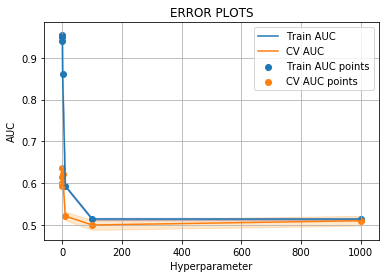

In [61]:
plotROC(tfidftext, param_grid, 'alpha')

16000
4000


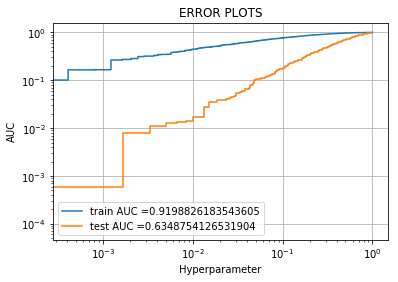

In [62]:
y_train_pred = batch_predict(tfidftext, X_train)    
y_test_pred = batch_predict(tfidftext, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.semilogx()
plt.semilogy()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [63]:
tfidftext = MultinomialNB(alpha=0.1)
tfidftext.fit(X_train, y_train)
y_pred = tfidftext.predict(X_test)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999995838466588 for threshold 0.464


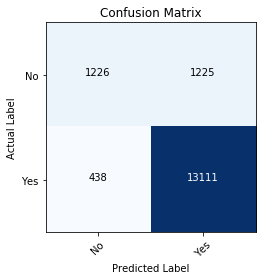

In [64]:
print("Train confusion matrix")
plot_confusion_matrix(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), classes=['No', 'Yes'])

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.874


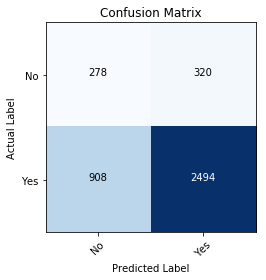

In [65]:
print("Test confusion matrix")
plot_confusion_matrix(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), classes=['No', 'Yes'])

#### 2.4.2.1 Top 10 important features of positive class from<font color='red'> SET 2</font>

In [80]:
pos_class_prob_sorted = (-tfidftext.feature_log_prob_[1, :]).argsort()
positive_class_prob_sorted=pos_class_prob_sorted[ : : -1]
for i in range(0,10):
    print(tfidf_features[positive_class_prob_sorted[i]])

Grades 3-5
Grades PreK-2
Grades 6-8
Grades 9-12
Othr
chocolate
gopro
intact
hatching
bacteria


#### 2.4.2.2 Top 10 important features of negative class from<font color='red'> SET 2</font>

In [81]:
pos_class_prob_sorted = (-tfidftext.feature_log_prob_[0, :]).argsort()
positive_class_prob_sorted=pos_class_prob_sorted[ : : -1]
for i in range(0,10):
    print(tfidf_features[positive_class_prob_sorted[i]])

fist
fairy
bottled
eye
familiarize
arithmetic
peanut
mallets
toon
toothbrush


<h1>3. Conclusions</h1>

In [82]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Alpha", "AUC"]

x.add_row(["BOW", "Brute", 0.1, 0.63])
x.add_row(["TFIDF", "Brute", 0.1, 0.64])

print(x)

+------------+-------+-------+------+
| Vectorizer | Model | Alpha | AUC  |
+------------+-------+-------+------+
|    BOW     | Brute |  0.1  | 0.63 |
|   TFIDF    | Brute |  0.1  | 0.64 |
+------------+-------+-------+------+


** With above observations one can conclude that TFIDF is slightly better than BOW **